In [41]:
import os
import tensorflow as tf
import sys
import csv
import json
import io
from panda3d.core import Thread
from direct.stdpy.file import *
import pickle
import gzip
import numpy as np
from numpy.lib.stride_tricks import as_strided
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import scipy
import skimage
import PIL
import glob

In [42]:
datasetPath = './dataset/'

In [43]:
def frame2numpy(frame, frameSize):
	buff = np.fromstring(frame, dtype='uint8')
	# Scanlines are aligned to 4 bytes in Windows bitmaps
	strideWidth = int((frameSize[0] * 3 + 3) / 4) * 4
	# Return a copy because custom strides are not supported by OpenCV.
	return as_strided(buff, strides=(strideWidth, 3, 1), shape=(frameSize[1], frameSize[0], 3)).copy()

In [44]:
files_names = [f.replace('\\','/') for f in glob.glob(datasetPath+'*/*/*/*')]

In [45]:
files_names[10]

'./dataset/CLEAR/0/1496613715/107.pz'

In [46]:
data = []
files_name = [f for f in os.listdir(datasetPath) if '.pz' in f]
for f in files_name:
    f = gzip.open(datasetPath+f, 'rb')
    data.append([f,pickle.load(f)])

In [47]:
data = []
f = gzip.open(files_names[10], 'rb')
data.append([f,pickle.load(f)])

In [48]:
data[0][1].keys()

dict_keys(['steering', 'frame', 'throttle', 'speed', 'yawRate', 'location', 'brake', 'peds', 'trafficSigns', 'time', 'vehicles', 'reward'])

<gzip _io.BufferedReader name='./dataset/CLEAR/0/1496613715/107.pz' 0x1d572c2c9b0>
3


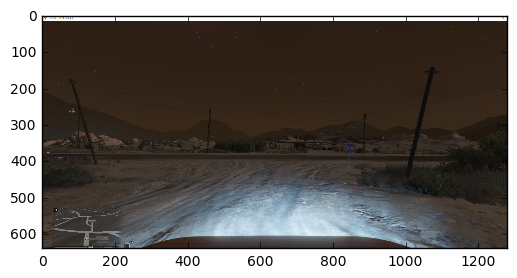

In [51]:
for frame in data:
    print(frame[0])
    print(len(frame[1]['peds']))
    img = frame2numpy(frame[1]['frame'], (1280,640))
    plt.imshow(img)
    plt.show()

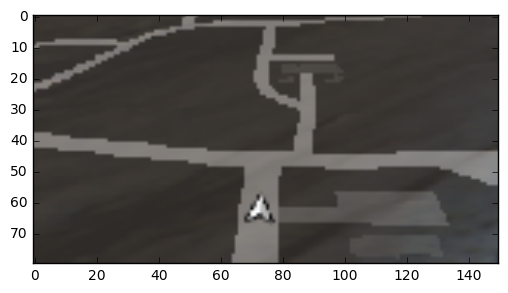

In [52]:
img = frame2numpy(data[0][1]['frame'], (1280,640))
img = PIL.Image.fromarray(np.uint8(img)).crop((50, 550, 200, 630))
img.resize((1280,int(1280/2)), PIL.Image.ANTIALIAS)
plt.imshow(img)